# Floresta de Caminhos Ótimos (Optimum-Path Forest)

O OPF é um *framework* para o desenvolvimento de classificadores *supervisionados* e *não-supervisionados* (a versão supervisionada foi criada pelo professor *João Paulo Papa*). A base destes métodos é a representação dos conjuntos de amostras como grafos.

## OPF Supervisionado

O OPF supervisionado é utilizado para tarefas de classificação, como já estamos acostumados a fazer. Basicamente, o treinamento desse modelo se divide nas seguintes etapas:

### 1 - Representação dos dados

O conjunto de dados é representado por um grafo, onde cada vértice (ou nó) representa uma amostra e sua posição no grafo é representado pelo valor de cada uma de suas características. Esses vértices são conectados por arestas, cujos pesos são representados pela distância entre o par de vértices. 


<img src='assets/graphOPF.jpeg' width=400px>

Note que este grafo pode ser completo, i.e., todos os vértices são conectados a todos os outros vértices, ou $k$-nn, ou seja, cada vértice está conectado aos $k$ vizinhos mais próximos.

- Grafo Completo
<img src='assets/grafoCompleto.jpeg' width=400px>

- Grafo $k$-nn
<img src='assets/grafoknn.jpeg' width=400px>

### 2 - Obtenção dos protótipos

Os protótipos são as amostras mais representativas de cada classe, e iniciam o processo de conquista das demais amostras. Esses protótipos podem ser encontrados em um processo de 2 etapas:

1. Computar a árvore geradora mínima ( _Minimum spanning tree (MST)_ ). Essa árvore pode ser computada utilizando diversos algoritmos, como por exemplo Dijkstra, Prim ou Kruskal. Geralmente Dijkstra é o utilizado. 

<img src='assets/Dijkstra_Animation.gif' width=400px>

2. Seleciona os vértices na região de fronteira entre as classes como protótipos:

<img src='assets/prototipos.png' width=400px>


### 3 - Conquista e classificação

Após a definição dos protótipos, cada amostra recebe um custo associado, definido da seguinte maneira:

\begin{eqnarray}
 \label{e.fmax}
f_{max}(\langle
q\rangle) & = & \left\{ \begin{array}{ll}
  0 & \mbox{if q $\in {\cal P}$,} \\
  +\infty & \mbox{otherwise}
  \end{array}\right. \nonumber \\
  f_{max}(\phi_{q} \cdot \langle q,u \rangle) & = & \max\{f_{max}(\phi_{q}),d(q,u)\}, 
\end{eqnarray}


onde ${\cal P}$ é o conjunto de protótipos, $\phi_{q}$ é um caminho, i.e., uma sequência de nós adjacentes iniciado em ${\cal P}$ e terminando em ${q}$, e $d(q,u)$ entre os nós $q$ e $u$. Além disso, $\phi_{q} \cdot \langle q,u \rangle$ é a concatenação entre o caminho $\phi_{q}$ e a aresta $\langle q,u \rangle$. Resumindo, $f_{max}(\phi_{q})$ é a distância máxima de todas as amostras no caminho $\phi_{q}$.

Na sequência, é estabelecida uma competição entre os protótipos para definir a conquista das damais amostras. O processo é executado de forma a minimizar o custo associado a cada amostra, da seguinte maneira:

\begin{equation}
\label{e.conquering_function}
	C(u)  =  \min_{\forall q \in {\cal V}}\{\max\{C(q),d(q,u)\}\}, 
\end{equation}
onde ${\cal V}$ é o conjunto de vizinhos de $u$.

## Classificação com OPF utilizando OPFython

O código para executar o OPF está disponível em Python atravéz do pacote [OPFython](https://arxiv.org/abs/2001.10420), que pode ser clonado do repositório [Github](https://github.com/gugarosa/opfython) ou instalado via pip com o comando `pip install opfython`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# importando função para dividir o conjunto em treinamento e teste, assim como 
#   fazemos com a função train_test_split do scikit-learn
import opfython.stream.splitter as s

# Importando o OPF supervisionado para classificação
from opfython.models.supervised import SupervisedOPF


# usando as configurações padrões do seaborn para plotagem
import seaborn as sns; sns.set()

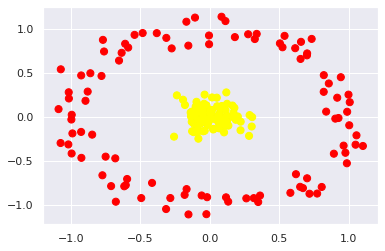

In [77]:
from sklearn.datasets import make_circles

X, y = make_circles(200, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [78]:
# Dividindo os dados em treinamento e teste
X_train, X_test, Y_train, Y_test = s.split(
    X, y, percentage=0.8, random_state=1)


2021-11-24 10:57:17,172 - opfython.stream.splitter — INFO — Splitting data ...
2021-11-24 10:57:17,174 - opfython.stream.splitter — DEBUG — X_1: (160, 2) | X_2: (40, 2) | Y_1: (160,) | Y_2: (40,).
2021-11-24 10:57:17,176 - opfython.stream.splitter — INFO — Data splitted.


In [79]:
Y_train

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1])

In [3]:
# Dividindo os dados em treinamento e teste
X_train, X_test, Y_train, Y_test = s.split(
    X, y, percentage=0.8, random_state=1)


# Cria uma instancia do OPF supervisionado
opf = SupervisedOPF()

# Ajusta o classificador considerando o conjunto de treinamento
opf.fit(X_train, Y_train)

# Predição no conjunto de testes
preds = opf.predict(X_test)

2021-11-23 21:29:37,666 - opfython.stream.splitter — INFO — Splitting data ...
2021-11-23 21:29:37,669 - opfython.stream.splitter — DEBUG — X_1: (160, 2) | X_2: (40, 2) | Y_1: (160,) | Y_2: (40,).
2021-11-23 21:29:37,671 - opfython.stream.splitter — INFO — Data splitted.
2021-11-23 21:29:37,672 - opfython.models.supervised — INFO — Overriding class: OPF -> SupervisedOPF.
2021-11-23 21:29:37,673 - opfython.core.opf — INFO — Creating class: OPF.
2021-11-23 21:29:37,674 - opfython.core.opf — DEBUG — Distance: log_squared_euclidean | Pre-computed distance: False.
2021-11-23 21:29:37,677 - opfython.core.opf — INFO — Class created.
2021-11-23 21:29:37,677 - opfython.models.supervised — INFO — Class overrided.
2021-11-23 21:29:37,679 - opfython.models.supervised — INFO — Fitting classifier ...
2021-11-23 21:29:37,681 - opfython.models.supervised — DEBUG — Finding prototypes ...
2021-11-23 21:29:38,437 - opfython.models.supervised — DEBUG — Prototypes: [147, 60].
2021-11-23 21:29:38,482 - opfy

In [4]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## Aprendizado não supervisionado

Em problemas de aprendizado não-supervisionado, temos apenas os dados de entrada ($X$) sem rótulos, e gostariamos que o algoritmo seja capaz de encontras alguma estrutura que represente os dados. Um algoritmo de agrupamento, como o OPF não-supervisionado, por exemplo, tenta juntar amostras em **agrupamentos** ( _clusters_ ) de acordo com alguma similaridade.


Exemplos: Análise de redes sociais, organização de _clusters_ de computadores, análise de dados astronômicos.





### Clustering (agrupamento)

Dado um conjunto de pontos, a ideia é agrupá-los de modo que:

- amostras dentro de cada agrupamento são similares entre si;
- amostras de agrupamentos diferentes são dissimilares;

Similaridade é definida usando alguma métrica de distância:

- euclidiana;
- cossenos;
- mahalanobis ...


<img src='assets/clustering1.jpg' width=900px>


## OPF Não-supervisionado

De forma similar a versão supervisionada, na versão não-supervisionada as amostras também são representadas como nós em um grafo, são escolhidos os protótipos, seguido pela etapa de conquista. No entanto, existem algumas diferenças:

### Obtenção dos protótipos

Na versão não-supervisionada, o peso inicial de cada amostra é dado pelo valor de sua densidade, a qual é computada usando a seguinte função de distribuição de probabilidade:

\begin{eqnarray}
  \rho(q) & = & \frac{1}{\sqrt{2\pi\psi^2}k} \sum_{\forall u\in {\cal A}_k(q)} \exp\left(\frac{-d^2(q,u)}{2\psi^2}\right), \label{e.density}
\end{eqnarray}

onde ${\cal A}_k(q)$ representa os $k$ vizinhos mais próximos da amostra $q$, $\psi = \frac{d_f}{3}$, e $d_f$ é o peso máximo entre as arestas no grafo. Note que o número de vizinhos ideal $k^*$ é escolhido de acordo com uma métrica de corte no grafo, onde todos os valores de $k$ no intervalo [$k_{min}$,$k_{max}$] ($k_{min}$ e $k_{max}$ são hiperparâmetros) são testados em uma busca axaustiva.

Todas as amostras são adicionadas em uma lista ordenada pelo valor de suas respectivas densidades de forma decrescente. A primeira amostra (com maior densidade) é removida dessa lista e automáticamente se transforma em um protótipo e tenta conquistar as amostras vizinhas. As proximas amostras são removidas consecutivamente da lista e é verificado se essa amostra já foi conquistada. Caso não tenha sido conquistada, ela também se transforma em um protótipo.

## Conquista

Para conquistar uma amostra durante o treinamento, um protótipo ou uma amostra conquistada deve oferecer um custo melhor ao que essa amostra já possui. Esse custo é computado da seguinte forma:


\begin{eqnarray}
\label{e.pf2}
f_{min}(\langle u \rangle) & = & \left\{ \begin{array}{ll} 
    \rho(u)           & \mbox{if $u \in {\cal P}$} \\
    \rho(u) - \delta  & \mbox{otherwise,}
 \end{array}\right. \nonumber \\
f_{min}(\langle \phi_q\cdot \langle q,u\rangle\rangle)&=& \min \{f_{min}(\phi_{q}), \rho(u)\},
\end{eqnarray}
onde $\delta$ é uma constante pequena. A Figura abaixo ilusta o procedimento:

<img src='assets/naoSup.jpeg' width=600px>

- (a) densidades
- (b) removeu 1° amostra, que se tornou protótipo
- (c) após processo de conquista

## Clustering com OPF utilizando OPFython

In [199]:
import opfython.math.general as g
import opfython.stream.parser as p
from opfython.models import UnsupervisedOPF

from sklearn.datasets import make_blobs

# Para não ficar mostrando um monte de logs
import logging
logging.disable()

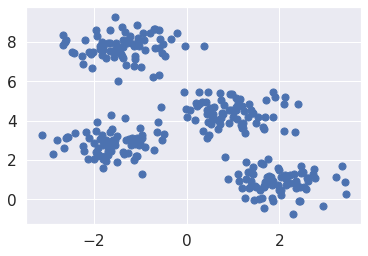

In [200]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [202]:
# Cria uma instância do opf não supervisionado
opf = UnsupervisedOPF(
    min_k=1, max_k=20)

In [203]:
# Ajusta o modelo aos dados
opf.fit(X, y_true)

In [204]:
# Se os dados estiverem rotulados, propaga o rótulo real de cada protótipo para todas as amostras por ele
#   conquistadas
opf.propagate_labels()

Número de agrupamentos =  4


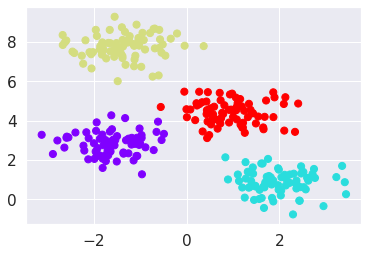

In [205]:
# faz a estimativa dos rótulos baseado no agrupamento
preds, clusters = opf.predict(X)


print('Número de agrupamentos = ',len(np.unique(clusters)))

plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='rainbow')


## Classificando com os rótulos propagados

Caso tenha propagado os rótulos, é possível utilizar essa abordagem para executar tarefas de classificação:

In [206]:
print(classification_report(y_true, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00        75

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



# Exercícios:

#### Baixe o dataset Breast Tissue do repositório UCI.

#### 1. Separar em treinamento e teste e classificar as amostras de teste utilizando o OPF supervisionado. 


##### Abrindo dataset

In [211]:
# Para não ficar mostrando um monte de logs
import logging
logging.disable()

In [212]:
import pandas as pd
df = pd.read_excel("BreastTissue.xls",sheet_name='Data',index_col='Case #')

In [213]:
df

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
Case #,,,,,,,,,,
1,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
2,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
3,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
4,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
5,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
...,...,...,...,...,...,...,...,...,...,...
102,adi,2000.000000,0.106989,0.105418,520.222649,40087.920984,77.059161,204.090347,478.517223,2088.648870
103,adi,2600.000000,0.200538,0.208043,1063.441427,174480.476218,164.071543,418.687286,977.552367,2664.583623
104,adi,1600.000000,0.071908,-0.066323,436.943603,12655.342135,28.963331,103.732704,432.129749,1475.371534


##### Separando características e labels

In [214]:
X = df.drop(columns=["Class"])
X = X.values

In [215]:
y = df['Class']
y = y.values

##### Normalizando os dados

In [216]:
from sklearn.preprocessing import StandardScaler
# Instancia o StandardScaler
normalizacao_std = StandardScaler()
# Analisa os dados e prepara o padronizador
dado_std = normalizacao_std.fit(X)
# Transforma os dados
X_std = normalizacao_std.transform(X)


##### Dividindo os dados em treinamento e teste

In [217]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_std, y, test_size=0.33,
                                                random_state=42)

In [218]:
print(X_train.shape)
print(Y_train.shape)

(71, 9)
(71,)


In [219]:
print(X_test.shape)
print(Y_test.shape)

(35, 9)
(35,)


##### Utilizando LabelEnconder para codificar as labels com valores entre 0 e n_classes-1.

In [220]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_test = label_encoder.fit_transform(Y_test)
Y_train = label_encoder.fit_transform(Y_train)

##### Treinamento e predição do modelo

In [221]:
%matplotlib inline
import numpy as np

# Importando o OPF supervisionado para classificação
from opfython.models.supervised import SupervisedOPF

In [222]:
# Cria uma instancia do OPF supervisionado
opf = SupervisedOPF()

# Ajusta o classificador considerando o conjunto de treinamento
opf.fit(X_train, Y_train)

# Predição no conjunto de testes
preds = opf.predict(X_test)

##### Resultados

In [223]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         8
           2       1.00      0.83      0.91         6
           3       0.57      0.80      0.67         5
           4       0.67      0.80      0.73         5
           5       0.50      0.33      0.40         6

    accuracy                           0.80        35
   macro avg       0.79      0.79      0.78        35
weighted avg       0.81      0.80      0.79        35



In [224]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, preds)

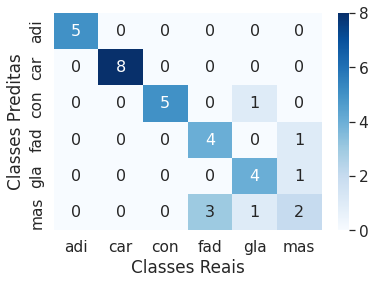

In [225]:
# usando as configurações padrões do seaborn para plotagem
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,annot_kws={"size": 16}, cmap=plt.cm.Blues,
            xticklabels=label_encoder.inverse_transform(np.unique(Y_test)),
            yticklabels=label_encoder.inverse_transform(np.unique(preds)),)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas');

#### 2. Agrupar os dados utilizando o OPF-não supervisionado e propagar o rótulo considerando um conjunto de treinamento. Classificar as amostras de teste considerando os rótulos propagados.

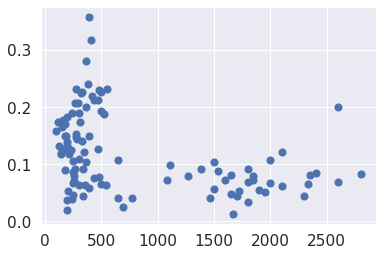

In [262]:
plt.scatter(X[:, 0], X[:, 1], s=50);

In [237]:
import opfython.math.general as g
import opfython.stream.parser as p
from opfython.models import UnsupervisedOPF

In [238]:
# Cria uma instância do opf não supervisionado
opf = UnsupervisedOPF(
    min_k=1, max_k=20)

In [249]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)
#y = label_encoder.fit_transform(y)

In [263]:
# Ajusta o modelo aos dados
opf.fit(X_train, Y_train)

In [264]:
# Se os dados estiverem rotulados, propaga o rótulo real de cada protótipo para todas as amostras por ele
#   conquistadas
opf.propagate_labels()

In [265]:
# faz a estimativa dos rótulos baseado no agrupamento
preds, clusters = opf.predict(X_test)


print('Número de agrupamentos = ',len(np.unique(clusters)))

Número de agrupamentos =  2


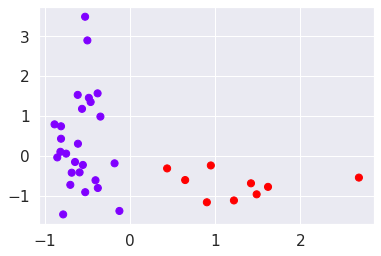

In [267]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=clusters, s=50, cmap='rainbow')

In [268]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.19      1.00      0.32         5
           5       0.00      0.00      0.00         6

    accuracy                           0.29        35
   macro avg       0.12      0.33      0.17        35
weighted avg       0.11      0.29      0.15        35



/home/igornieto/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igornieto/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/igornieto/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)